# Feature Summary
### Stock Price
`Price`: Date of the stock data (needs cleaning as the first two rows are headers).    
`Adj Close`: Adjusted closing price, accounting for events like dividends and splits.    
`Close`: Closing price of the stock at the end of the trading day.  
`High`: Highest price of the stock during the trading day.  
`Low`: Lowest price of the stock during the trading day.  
`Open`: Opening price of the stock at the start of the trading day.  
`Volume`: Number of shares traded during the day.  

### Synthetic Commodity Price Data
Daily Prices: Open, High, Low, Close   
Trading Volume   
`Commodity`: Gold, Silver, Crude Oil, Natural Gas, Copper
Market Sentiment Score (from -1 to 1)   
Economic Indicators: GDP Growth, Inflation, Interest Rates   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

google = pd.read_csv('googl_data_2020_2025.csv')

# EDA

## Google Stock

In [2]:
google.head(10)

,Price,Adj Close,Close,High,Low,Open,Volume
0,Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
1,Date,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-02 00:00:00+00:00,68.18682098,68.43399811,68.43399811,67.32450104,67.42050171,27278000
3,2020-01-03 00:00:00+00:00,67.83010101,68.0759964,68.6875,67.36599731,67.40000153,23408000
4,2020-01-06 00:00:00+00:00,69.63805389,69.89050293,69.91600037,67.55000305,67.58149719,46768000
5,2020-01-07 00:00:00+00:00,69.50354767,69.75550079,70.17500305,69.57800293,70.02300262,34330000
6,2020-01-08 00:00:00+00:00,69.99825287,70.2519989,70.59249878,69.63150024,69.74099731,35314000
7,2020-01-09 00:00:00+00:00,70.73309326,70.98950195,71.43399811,70.51049805,71.09649658,33200000
8,2020-01-10 00:00:00+00:00,71.18992615,71.44799805,71.74700165,70.98000336,71.47350311,26258000
9,2020-01-13 00:00:00+00:00,71.74143219,72.00150299,72.0739975,71.26850128,71.76249695,30730000


In [3]:
# Drop the first 2 rows
google = google.drop(index=[0,1]).reset_index(drop=True)  # prevents the old index from being added as a new column

# Rename column "Price" to "Date"
google.rename(columns={'Price': 'Date'}, inplace=True)

In [4]:
# Print info
print(google.info())

# check for missing values
print('\nCheck for missing values:')
print(google.isnull().sum())

# check for duplicate values
print('\nCheck for duplicate value:')
print(google.duplicated().value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1258 non-null   object
 1   Adj Close  1258 non-null   object
 2   Close      1258 non-null   object
 3   High       1258 non-null   object
 4   Low        1258 non-null   object
 5   Open       1258 non-null   object
 6   Volume     1258 non-null   object
dtypes: object(7)
memory usage: 68.9+ KB
None

Check for missing values:
Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

Check for duplicate value:
False    1258
Name: count, dtype: int64


In [5]:
# Convert "Date" column to datetime, forcing errors to NaN, then format to 'yyyy-mm-dd'
google['Date'] = pd.to_datetime(google['Date'], errors='coerce').dt.date

# Convert back to datetime
google['Date'] = pd.to_datetime(google['Date'])

# Convert columns to numeric, forcing errors to NaN
google[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']] = google[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']].apply(pd.to_numeric, errors='coerce')

# Check dataset again
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Adj Close  1258 non-null   float64       
 2   Close      1258 non-null   float64       
 3   High       1258 non-null   float64       
 4   Low        1258 non-null   float64       
 5   Open       1258 non-null   float64       
 6   Volume     1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [6]:
google.describe()

,Date,Adj Close,Close,High,Low,Open,Volume
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,2022-07-01 15:39:46.645468928,118.684965,119.075610,120.378055,117.722657,119.004592,3.308795e+07
min,2020-01-02 00:00:00,52.516125,52.706501,53.345501,50.443501,52.818501,9.312000e+06
25%,2021-04-02 00:00:00,93.608171,93.947502,95.272123,92.305002,93.832497,2.343938e+07
50%,2022-06-30 12:00:00,119.267639,119.699997,121.044502,118.626247,119.712502,2.943300e+07
75%,2023-10-01 06:00:00,140.598320,141.107998,142.101002,139.796120,140.996876,3.773515e+07
max,2024-12-31 00:00:00,196.660004,196.660004,201.419998,194.979996,197.250000,1.232000e+08
std,NaN,32.403071,32.453265,32.688266,32.248276,32.481362,1.461758e+07


C:\Users\HanDong\AppData\Local\Temp\ipykernel_12612\1875884726.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=google, x='Year', palette='viridis')


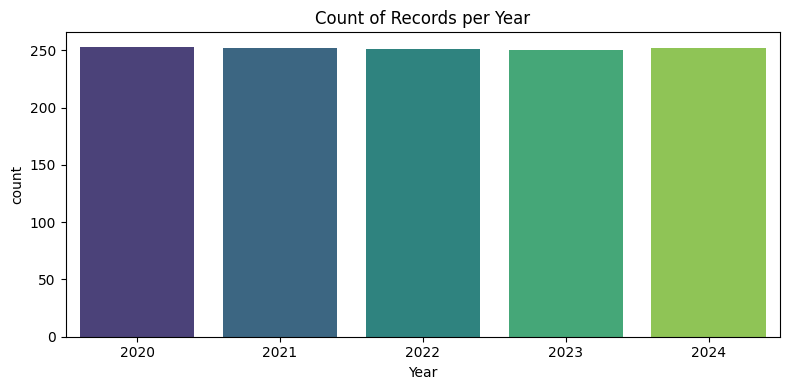

In [7]:
# Create more features to analyse
google['Year'] = google['Date'].dt.year
google['Month'] = google['Date'].dt.month
google['Day'] = google['Date'].dt.day

# Count plot (pie chart style) for the 'Year' column to inspect distribution over time
plt.figure(figsize=(8, 4))
sns.countplot(data=google, x='Year', palette='viridis')
plt.title('Count of Records per Year')
plt.tight_layout()
plt.show()

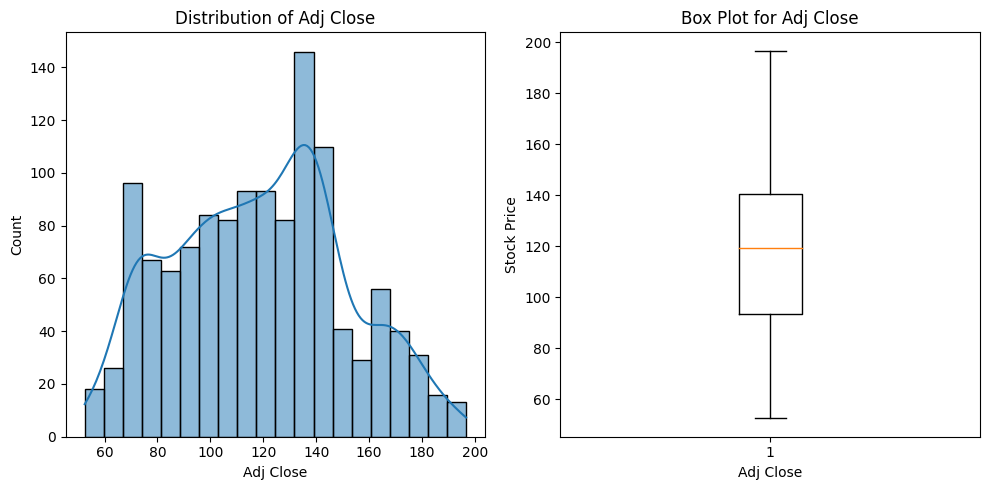

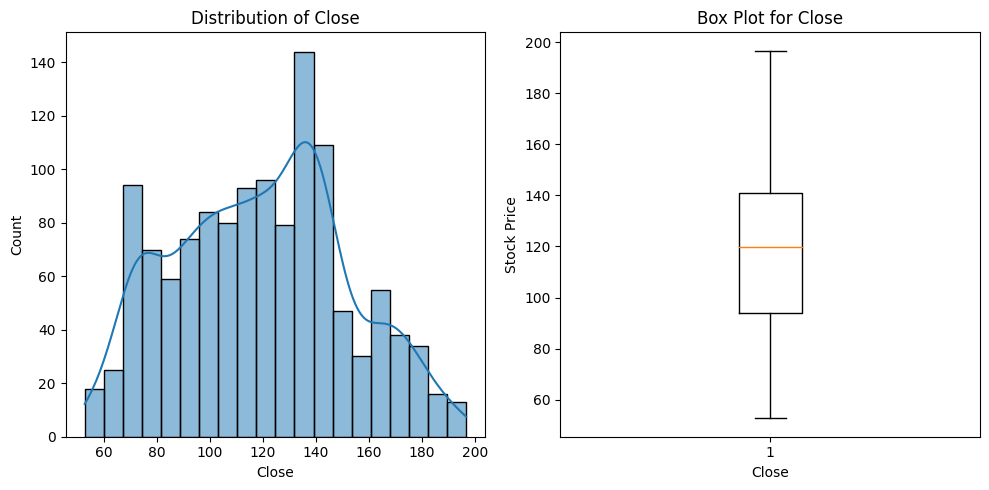

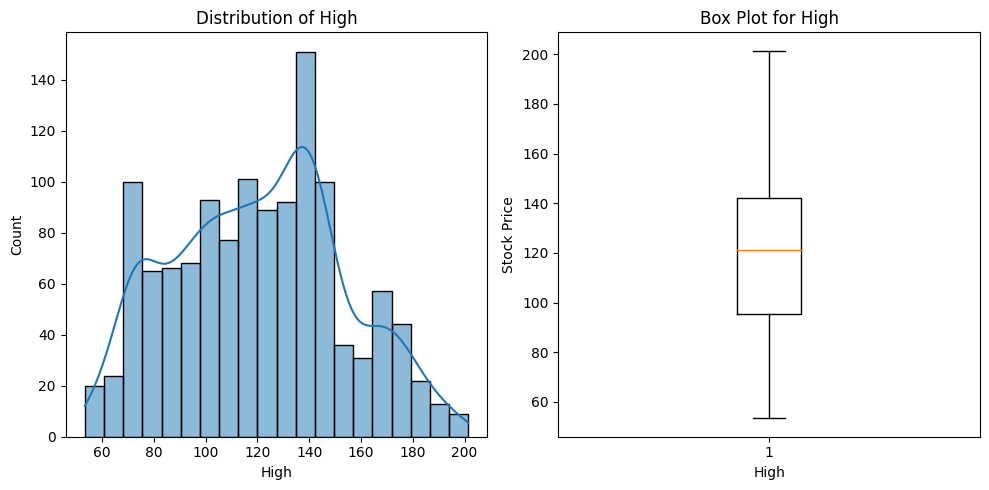

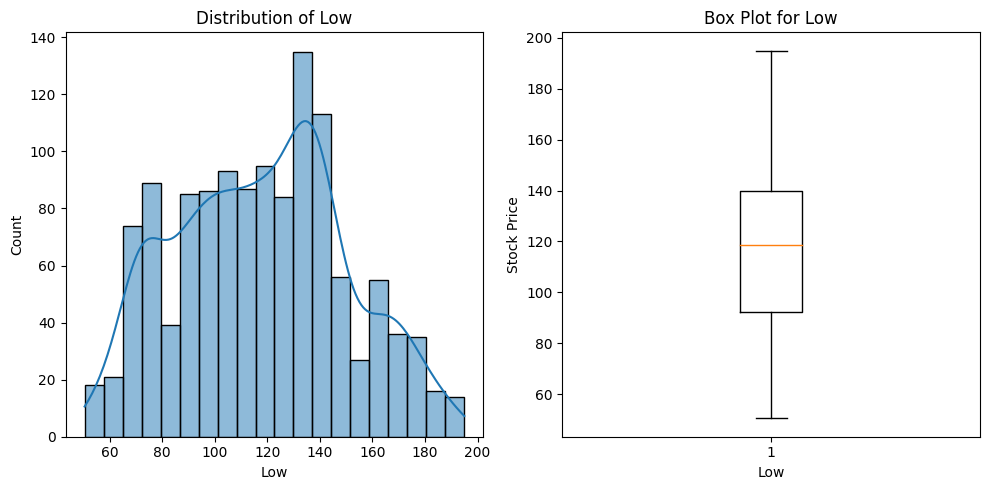

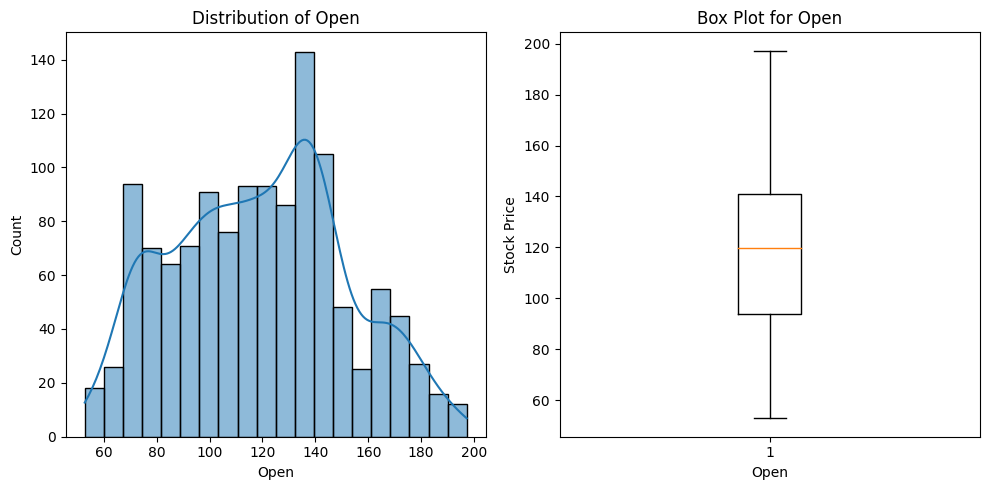

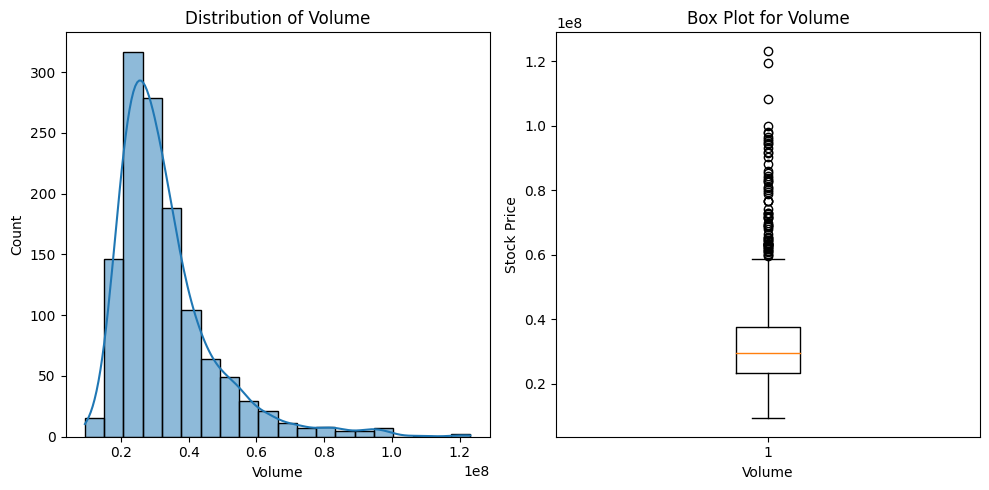

In [8]:
# Distribution of features
numeric_cols = ['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']
for col in numeric_cols:
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.histplot(data=google, x=col, kde=True, bins=20)
    plt.title(f"Distribution of {col}")

    plt.subplot(1,2,2)
    plt.boxplot(x=google[col])
    plt.title(f"Box Plot for {col}")
    plt.ylabel("Stock Price")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

### Outlier Analysis: Trading
We analyzed the trading volume (Volume) column in the dataset using the IQR (Interquartile Range) method and obtained the following results:

Total data points: 1258  
Outliers detected: 70 (5.56%)    

Minimum and maximum values of outliers:   
Minimum: 9,312,000   
Maximum: 123,200,000 (Clearly an extreme outlier!)

**Should We Remove Outliers?**    
Outliers Are Important in Financial Data: Significant increases in trading volume are usually caused by major market movements, investor sentiment, or important news (e.g., earnings reports, major deals).     
Low Percentage of Outliers (5.56%): Since outliers only make up 5.56% of the dataset, removing them could make it harder to analyze major market movements.     
A More Logical Approach: Instead of removing all outliers, we could only eliminate extreme values (e.g., trading volumes above 100 million) for a better analysis.    

In [9]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = google['Volume'].quantile(0.25)
Q3 = google['Volume'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
upper_bound = Q3 + 1.5 * IQR
extreme_outliers = google[google['Volume'] > (upper_bound + 1.5 * IQR)]

# Count the number of outliers
count_extreme_outliers = extreme_outliers.shape[0]

print(f"Number of extreme outliers: {count_extreme_outliers}")

Number of extreme outliers: 25


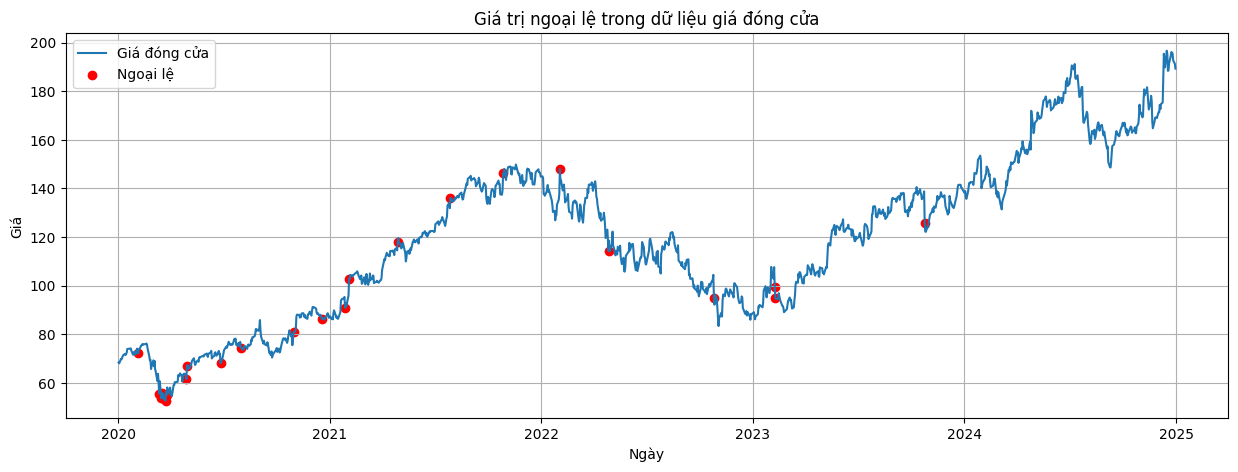

In [10]:
# Visualize extreme outliers
plt.figure(figsize=(15, 5))
plt.plot(google['Date'], google['Close'], label='Giá đóng cửa')
plt.scatter(extreme_outliers['Date'], extreme_outliers['Close'], color='red', label='Ngoại lệ')
plt.title('Giá trị ngoại lệ trong dữ liệu giá đóng cửa')
plt.xlabel('Ngày')
plt.ylabel('Giá')
plt.legend()
plt.grid()
plt.show()

Text(0.5, 0, 'Volume')

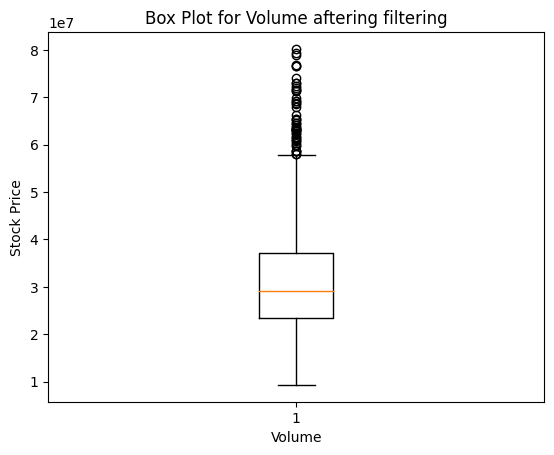

In [11]:
# Removing extreme outliers
google = google[google["Volume"] <= (upper_bound + 1.5 * IQR)]

# Visualize distribution of Volume aftering filtering
plt.boxplot(x=google['Volume'])
plt.title("Box Plot for Volume aftering filtering")
plt.ylabel("Stock Price")
plt.xlabel('Volume')

### Financial Analysis

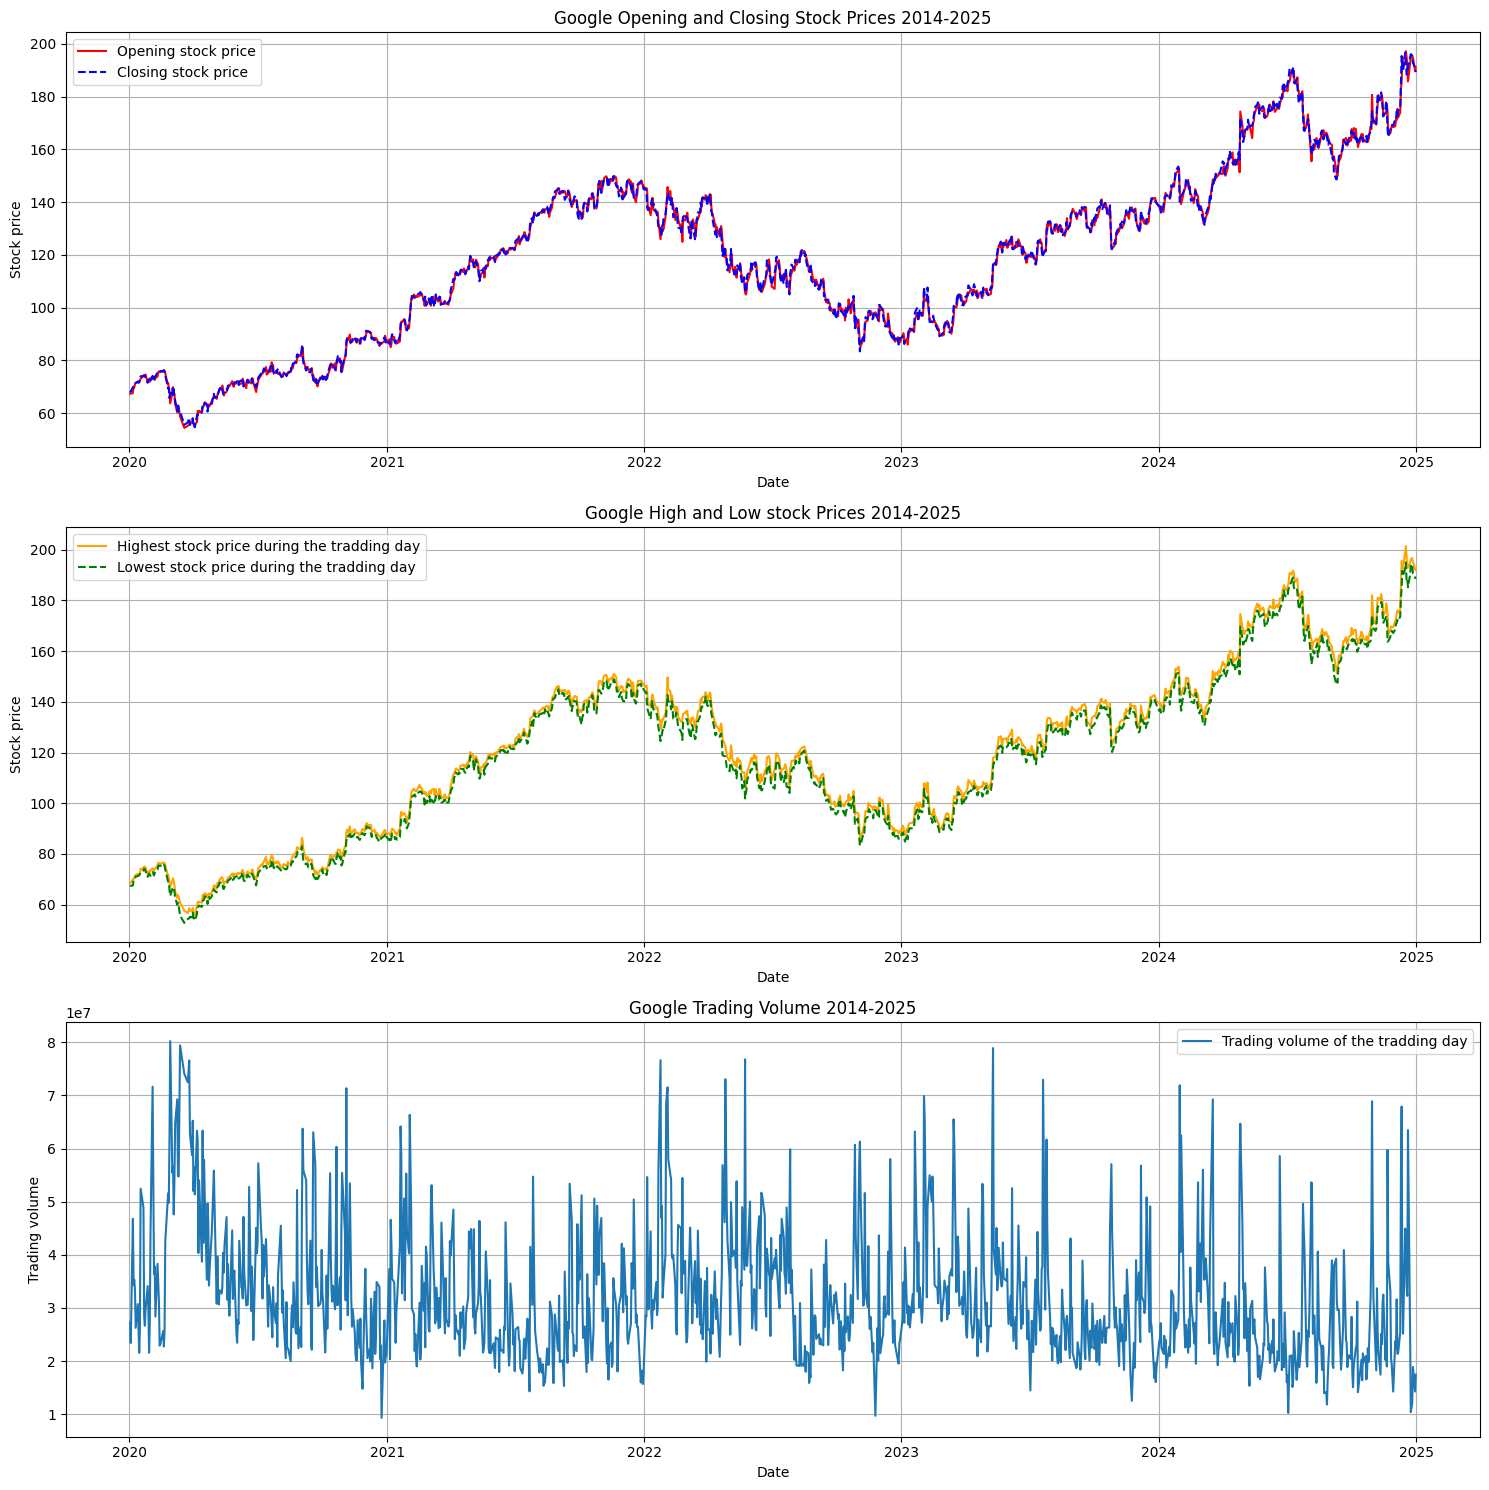

In [12]:
# Visualize Google stock price 2014 - 2025
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

# Opening and Close price
axs[0].plot(google['Date'], google['Open'], color='r', label ='Opening stock price')
axs[0].plot(google['Date'], google['Close'], color='b', linestyle="dashed", label ='Closing stock price')
axs[0].set_title('Google Opening and Closing Stock Prices 2014-2025')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Stock price')
axs[0].legend()
axs[0].grid()

# High and Low price
axs[1].plot(google['Date'], google['High'], color='orange', label ='Highest stock price during the tradding day')
axs[1].plot(google['Date'], google['Low'], color='g', linestyle="dashed", label ='Lowest stock price during the tradding day')
axs[1].set_title('Google High and Low stock Prices 2014-2025')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Stock price')
axs[1].legend()
axs[1].grid()

# Trading Volume
axs[2].plot(google['Date'], google['Volume'], label ='Trading volume of the tradding day')
axs[2].set_title('Google Trading Volume 2014-2025')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Trading volume')
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()

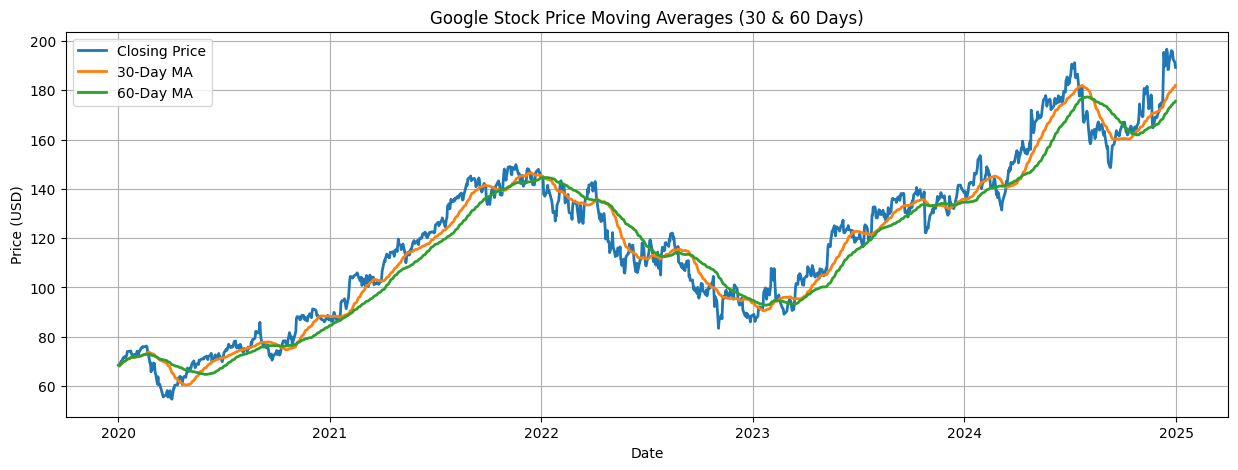

In [13]:
# Moving averages (Đường trung bình động - Đường nối tất cả mức giá đóng cửa trung bình)
google.loc[:, "Close_MA30"] = google["Close"].rolling(window=30, min_periods=1).mean()    # 30 ngày
google.loc[:, "Close_MA60"] = google["Close"].rolling(window=60, min_periods=1).mean()   # 60 ngày

plt.figure(figsize=(15, 5))
sns.lineplot(x=google['Date'], y=google["Close"], label="Closing Price", linewidth=2)
sns.lineplot(x=google['Date'], y=google["Close_MA30"], label="30-Day MA", linewidth=2)
sns.lineplot(x=google['Date'], y=google["Close_MA60"], label="60-Day MA", linewidth=2)
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.title("Google Stock Price Moving Averages (30 & 60 Days)")
plt.legend()
plt.grid()
plt.show()

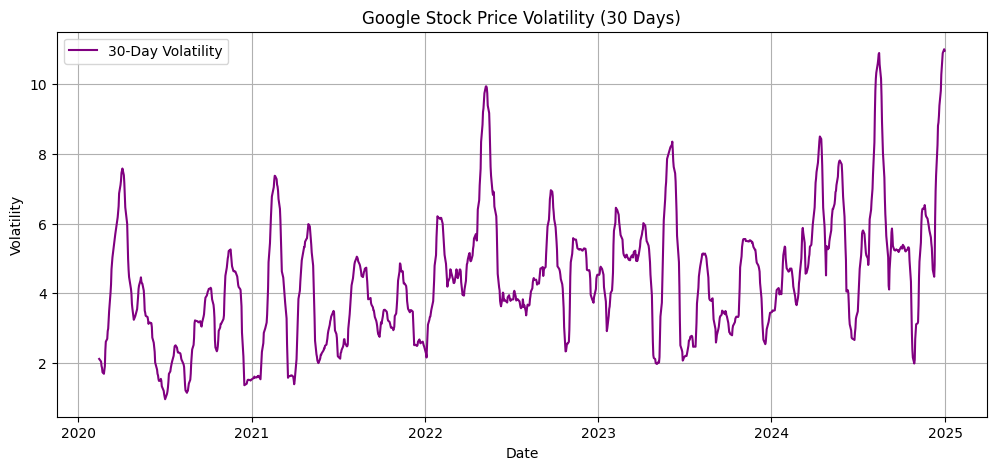

In [14]:
# Volatility (Độ biến Động - Độ lệch chuẩn của giá đóng cửa trong 30 ngày)
google["Volatility_30"] = google["Close"].rolling(window=30).std()  # 30 ngày

plt.figure(figsize=(12, 5))
plt.plot(google['Date'], google["Volatility_30"], label="30-Day Volatility", color='purple')
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.title("Google Stock Price Volatility (30 Days)")
plt.legend()
plt.grid()
plt.show()

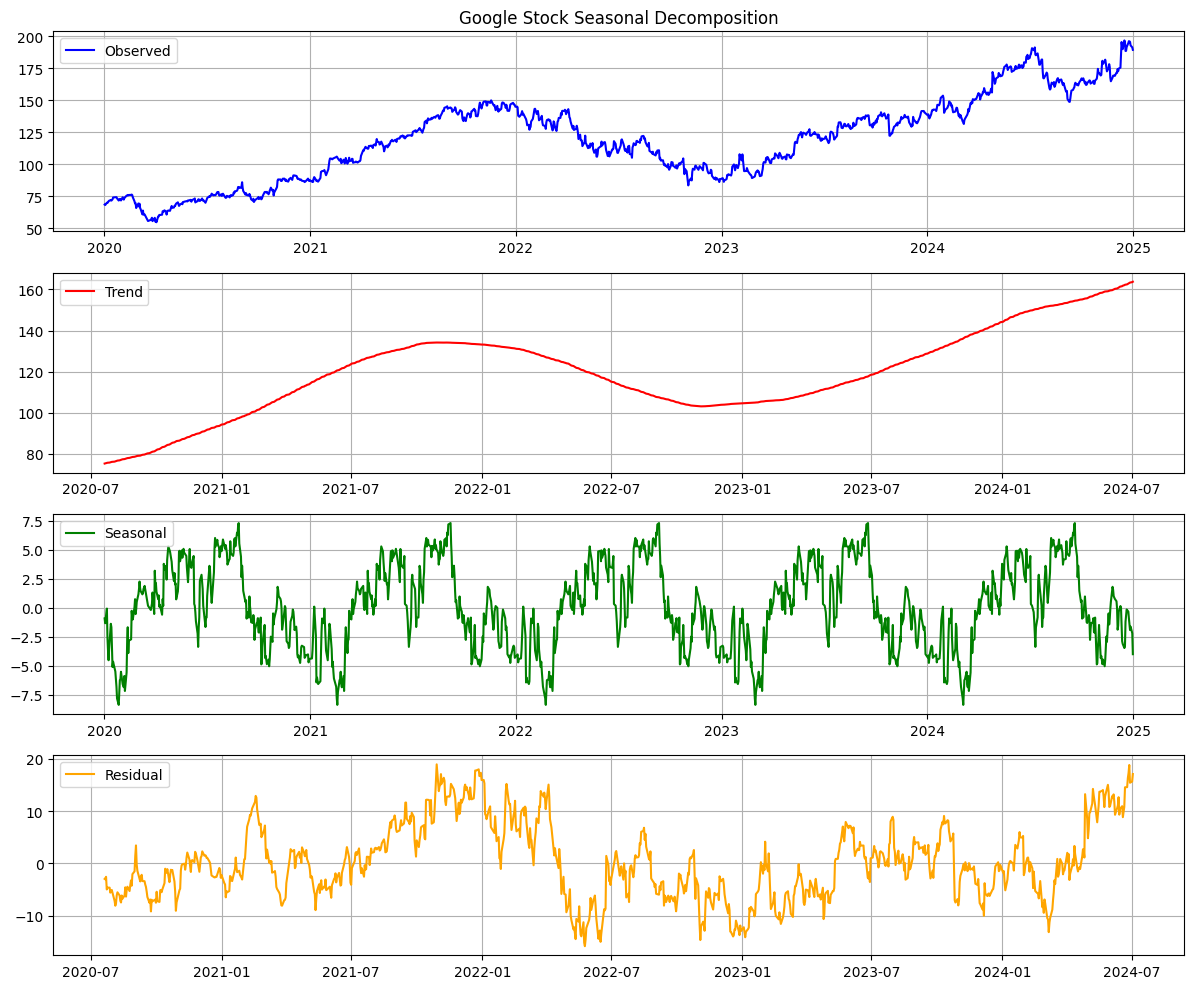

In [15]:
# Seasonal Decomposition (Phân tích tính thời vụ trên giá đóng cửa)
decomposition = seasonal_decompose(google["Close"], model="additive", period=252)   # 252 ngày giao dịch/năm

plt.figure(figsize=(12, 10))

plt.subplot(4, 1, 1)
plt.title("Google Stock Seasonal Decomposition")
plt.plot(google['Date'], decomposition.observed, label="Observed", color="blue")    # Observed (Dữ liệu gốc): Giá đóng cửa theo thời gian
plt.grid()
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(google['Date'], decomposition.trend, label="Trend", color="red")           # Trend (Xu hướng): Xu hướng dài hạn của giá cổ phiếu
plt.grid()
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(google['Date'], decomposition.seasonal, label="Seasonal", color="green")   # Seasonal (Thời vụ): Biến động có tính chu kỳ hàng năm
plt.grid()
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(google['Date'], decomposition.resid, label="Residual", color="orange")     # Residual (Phần dư): Phần không giải thích được bởi xu hướng và thời vụ
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

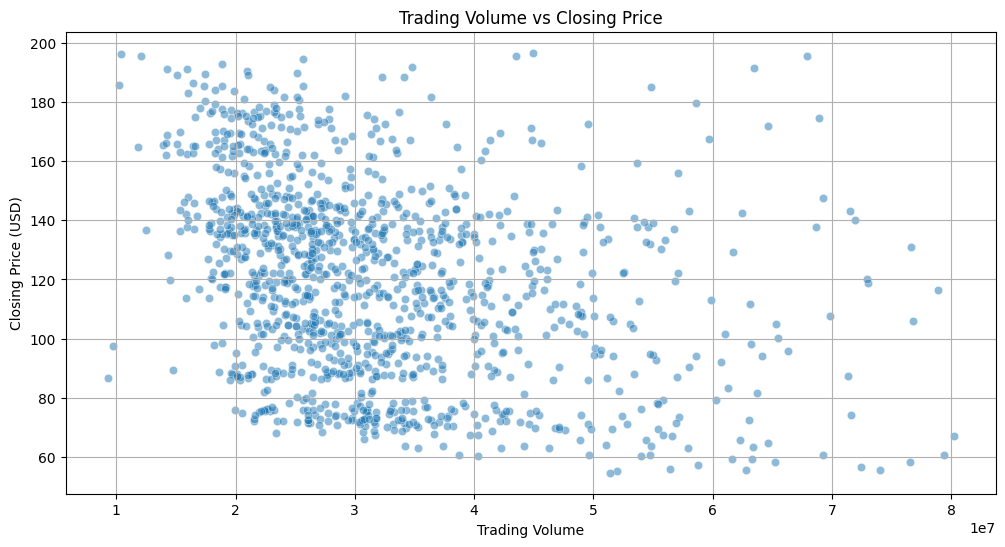

In [ ]:
# Volume vs Closing Price Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x=google["Volume"], y=google["Close"], alpha=0.5)
plt.xlabel("Trading Volume")
plt.ylabel("Closing Price (USD)")
plt.title("Trading Volume vs Closing Price")
plt.grid()
plt.show()

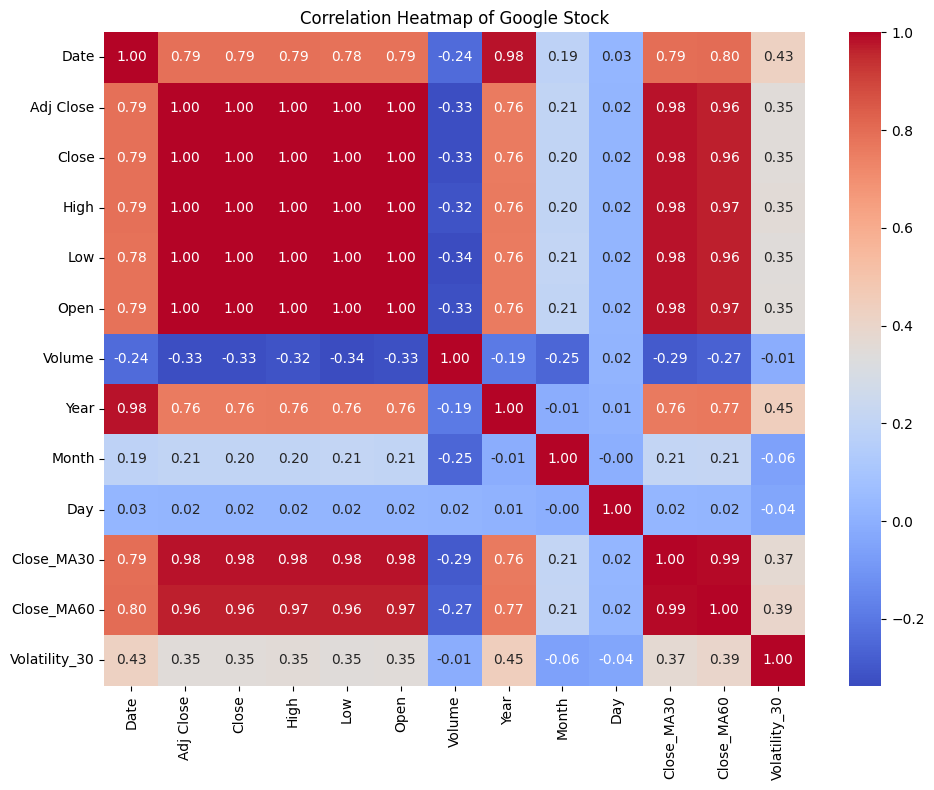

In [17]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = google.corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Google Stock')
plt.tight_layout()
plt.show()

In [18]:
# Save dataset
google.to_csv("Google_Stock_2020_2025.csv")

# Time Series Forcasting

## ARIMA


In [21]:
# Train - Test split
train_size = int(len(google) * 0.8)
train, test = google[:train_size]['Close'], google[train_size:]['Close']

In [31]:
from statsmodels.tsa.arima.model import ARIMA

# Define ARIMA model
arima = ARIMA(train, order=(1, 1, 1))

# Train model
arima_model = arima.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


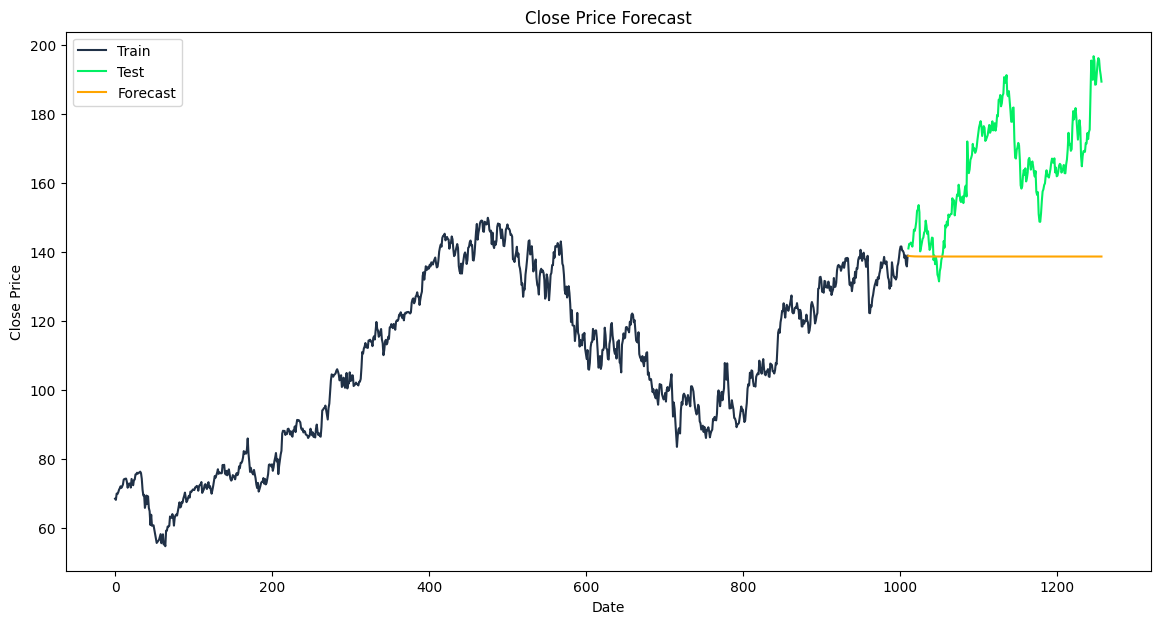

In [33]:
# Forecast
arima_forecast = arima_model.forecast(steps=len(test))

# Plot the results with specified colors
plt.figure(figsize=(14,7))
plt.plot(train.index, train, label='Train', color='#203147')
plt.plot(test.index, test, label='Test', color='#01ef63')
plt.plot(test.index, arima_forecast, label='Forecast', color='orange')
plt.title('Close Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## SARIMA

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA model
sarima = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))

# Train model
sarima_model = sarima.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


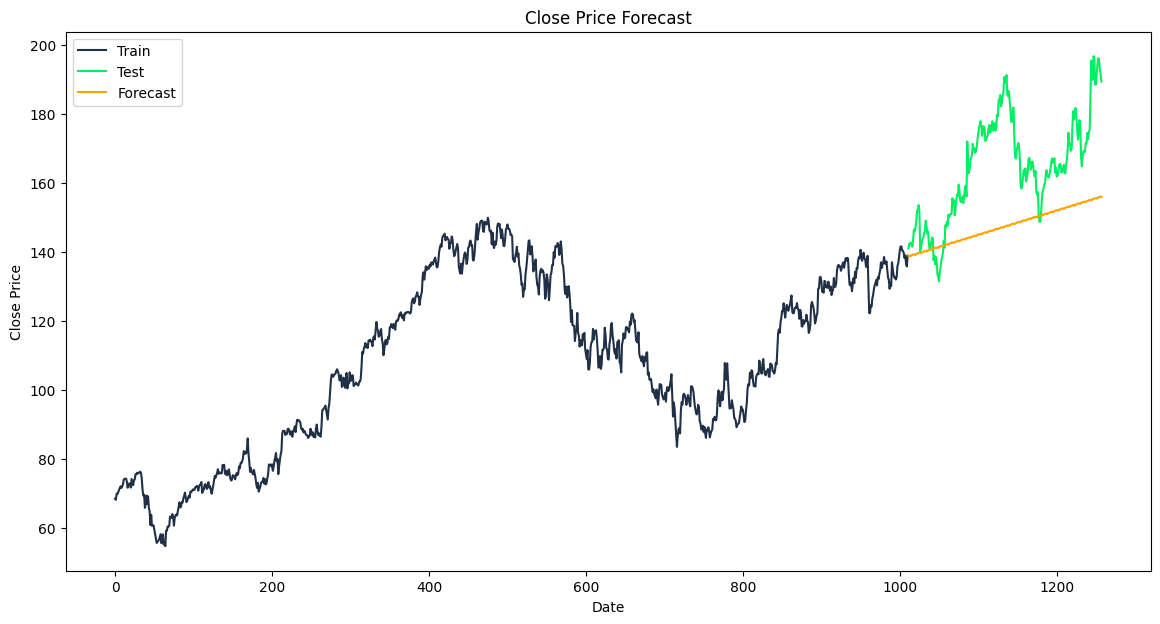

In [34]:
# Forecast
sarima_forecast = sarima_model.forecast(steps=len(test))

# Plot the results with specified colors
plt.figure(figsize=(14,7))
plt.plot(train.index, train, label='Train', color='#203147')
plt.plot(test.index, test, label='Test', color='#01ef63')
plt.plot(test.index, sarima_forecast, label='Forecast', color='orange')
plt.title('Close Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

### Evaluation

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

eval_custom_split = {
    "ARIMA": {
        "RMSE": np.sqrt(mean_squared_error(test, arima_forecast)),
        "MAE": mean_absolute_error(test, arima_forecast),
    },
    "SARIMA": {
        "RMSE": np.sqrt(mean_squared_error(test, sarima_forecast)),
        "MAE": mean_absolute_error(test, sarima_forecast),
    }
}

eval_custom_split

{'ARIMA': {'RMSE': np.float64(29.81008439843158), 'MAE': 25.988578904025704},
 'SARIMA': {'RMSE': np.float64(20.9679758319424), 'MAE': 17.611424513997143}}

## LSTM

In [44]:
from sklearn.preprocessing import MinMaxScaler

data = google[['Close']].values

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(scaled_data, window_size)

In [45]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

X_train = X_train.reshape((-1, window_size, 1))
X_test = X_test.reshape((-1, window_size, 1))

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, LayerNormalization, MultiHeadAttention, GlobalAveragePooling1D

# Define and train LSTM model
model_lstm = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 0.0501 - val_loss: 0.0012
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - loss: 0.0037 - val_loss: 0.0015
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0030 - val_loss: 0.0011
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0025 - val_loss: 0.0014
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - loss: 0.0028 - val_loss: 0.0013
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 9/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0023 - val_loss: 0.0011
Epoch 10/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 11/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 12/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - loss: 0.

In [49]:
# Forecast
y_pred_lstm = model_lstm.predict(X_test)
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step


### Evaluation

In [20]:
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))
rmse_lstm = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_lstm))
mae_lstm = mean_absolute_error(y_test_rescaled, y_pred_lstm)
print(f"LSTM - RMSE: {rmse_lstm:.2f}, MAE: {mae_lstm:.2f}")

LSTM - RMSE: 5.43, MAE: 4.18


## Transformer

In [53]:
import tensorflow as tf

# Define Transformer model
class TimeSeriesTransformer(tf.keras.Model):
    def __init__(self, input_shape):
        super().__init__()
        self.attn = MultiHeadAttention(num_heads=2, key_dim=32)
        self.norm = LayerNormalization()
        self.dropout = Dropout(0.1)
        self.pool = GlobalAveragePooling1D()
        self.fc = Dense(1)

    def call(self, x):
        attn_output = self.attn(x, x)
        x = self.norm(x + attn_output)
        x = self.dropout(x)
        x = self.pool(x)
        return self.fc(x)

# train model
model_tf = TimeSeriesTransformer(X_train.shape[1:])
model_tf.compile(optimizer='adam', loss='mean_squared_error')
model_tf.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.1653 - val_loss: 0.2637
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.1225 - val_loss: 0.2073
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0854 - val_loss: 0.1610
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0652 - val_loss: 0.1244
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0495 - val_loss: 0.0960
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0398 - val_loss: 0.0758
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0318 - val_loss: 0.0614
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0281 - val_loss: 0.0522
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0266 - val_loss: 0.0456
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0269 - val_loss: 0.0423
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0258 - val_loss: 0.0397
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0

In [54]:
# Forecast
y_pred_tf = model_tf.predict(X_test)
y_pred_tf = scaler.inverse_transform(y_pred_tf)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


### Evaluation

In [21]:
rmse_tf = np.sqrt(mean_squared_error(y_test_rescaled, y_pred_tf))
mae_tf = mean_absolute_error(y_test_rescaled, y_pred_tf)
print(f"Transformer - RMSE: {rmse_tf:.2f}, MAE: {mae_tf:.2f}")

Transformer - RMSE: 58.42, MAE: 56.54


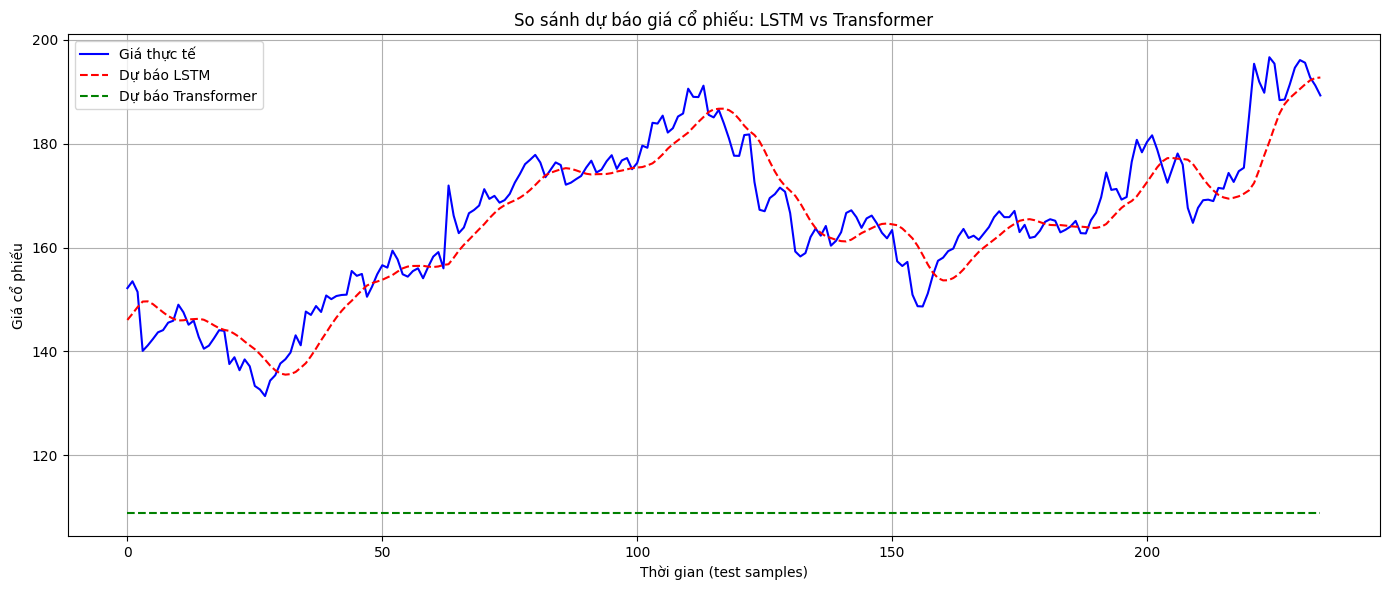

In [56]:
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, label="Actual price", color='blue')
plt.plot(y_pred_lstm, label="LSTM forecast", color='red', linestyle='dashed')
plt.plot(y_pred_tf, label="Transformer forecast", color='green', linestyle='dashed')
plt.title("LSTM and Transformer Time Series Forecasting Comparison")
plt.xlabel("Date (test samples)")
plt.ylabel("Stock Price")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


# XAI

In [ ]:
# Anh Duy